# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

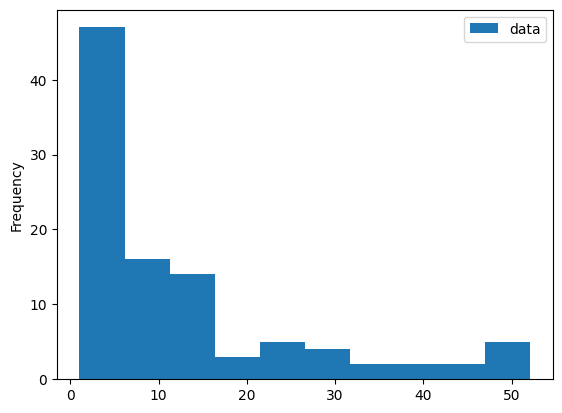

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

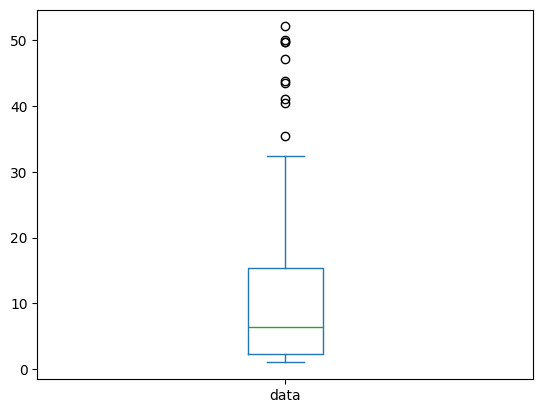

In [3]:
df.plot.box()

The histogram shows drug price distribution well and highlights how most prices fall in the lower range. That being said, it doesn’t do a good job of showing outliers or quartiles. The boxplot clearly displays the median, interquartile range, and extreme values, which helps identify how expensive high-end drugs are. Knowing that, I would choose the boxplot because it highlights outliers the administrator is interested in. To improve clarity, adding labels and scaling the y-axis appropriately for showing spread of drugs at different prices would be recommended.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

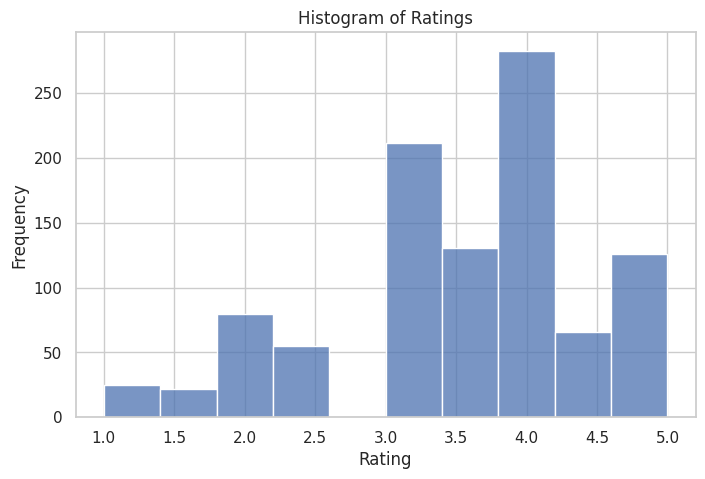

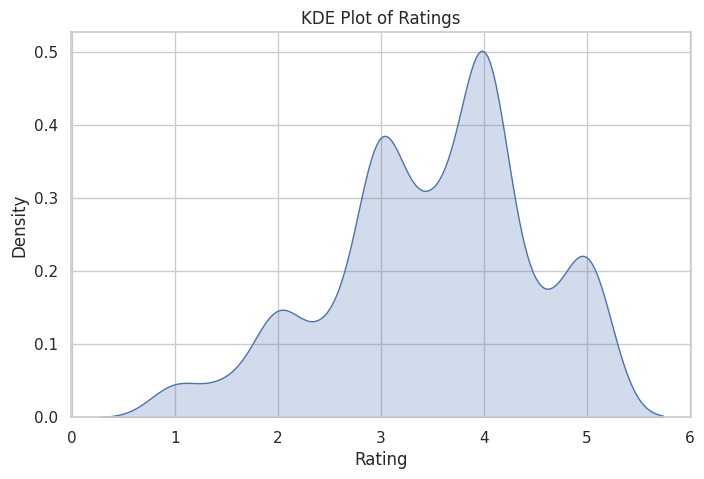

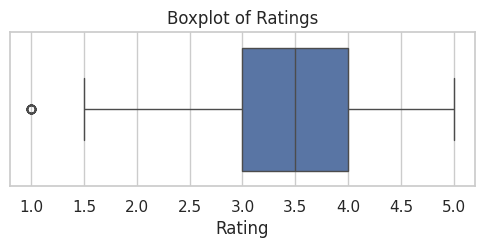

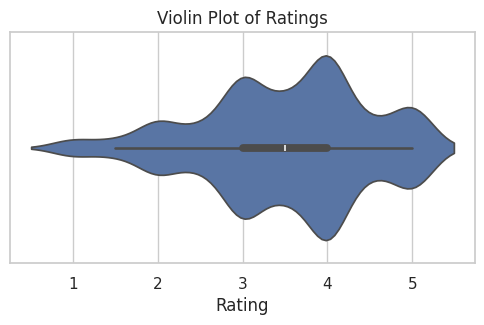

Ratings Mean: 3.509
Ratings Median: 3.5
Ratings Mode: 4.0


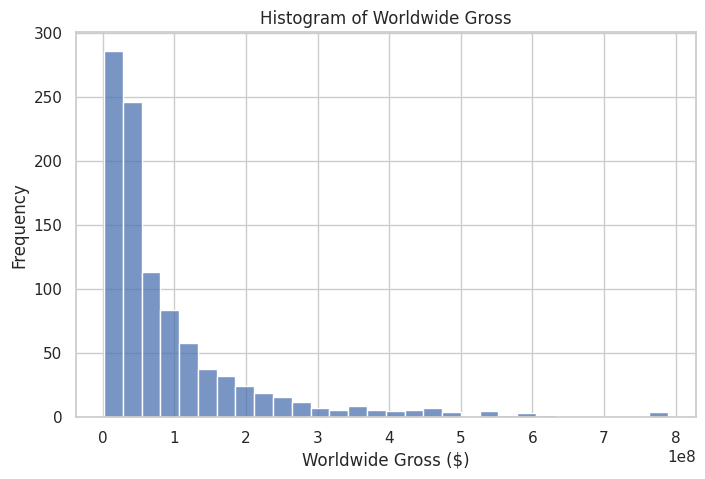

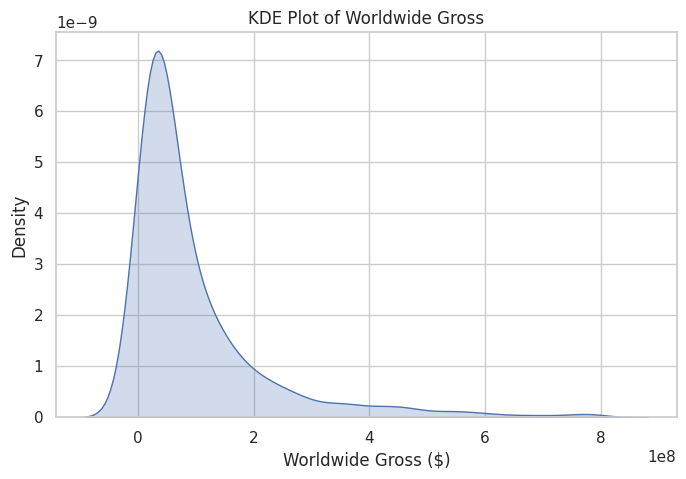

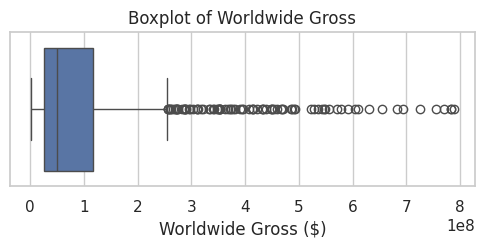

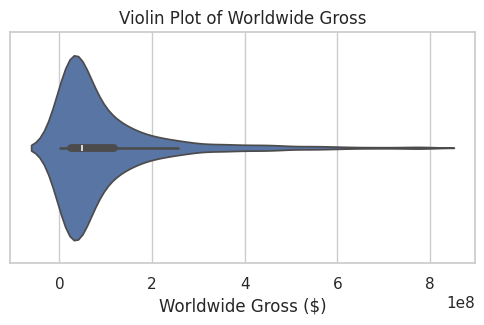

Box Office Mean: 97239022.181
Box Office Median: 49509237.0
Box Office Mode: 1666028.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df_ratings = pd.read_csv("ratings.csv")
df_ratings = df_ratings[(df_ratings["rating"] >= 1) & (df_ratings["rating"] <= 5)]
df_ratings = df_ratings.sample(n=min(1000, len(df_ratings)), random_state=42)

plt.figure(figsize=(8, 5))
sns.histplot(df_ratings['rating'], bins=10)
plt.title("Histogram of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(df_ratings['rating'], fill=True)
plt.title("KDE Plot of Ratings")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(6, 2))
sns.boxplot(x=df_ratings['rating'])
plt.title("Boxplot of Ratings")
plt.xlabel("Rating")
plt.show()

plt.figure(figsize=(6, 3))
sns.violinplot(x=df_ratings['rating'])
plt.title("Violin Plot of Ratings")
plt.xlabel("Rating")
plt.show()

print("Ratings Mean:", df_ratings['rating'].mean())
print("Ratings Median:", df_ratings['rating'].median())
print("Ratings Mode:", df_ratings['rating'].mode()[0])

df_box = pd.read_csv("enhanced_box_office_data.csv")
df_box = df_box[df_box["$Worldwide"].notnull()]
df_box = df_box[df_box["$Worldwide"] < df_box["$Worldwide"].quantile(0.98)]
df_box = df_box.sample(n=min(1000, len(df_box)), random_state=42)

plt.figure(figsize=(8, 5))
sns.histplot(df_box["$Worldwide"], bins=30)
plt.title("Histogram of Worldwide Gross")
plt.xlabel("Worldwide Gross ($)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(df_box["$Worldwide"], fill=True)
plt.title("KDE Plot of Worldwide Gross")
plt.xlabel("Worldwide Gross ($)")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(6, 2))
sns.boxplot(x=df_box["$Worldwide"])
plt.title("Boxplot of Worldwide Gross")
plt.xlabel("Worldwide Gross ($)")
plt.show()

plt.figure(figsize=(6, 3))
sns.violinplot(x=df_box["$Worldwide"])
plt.title("Violin Plot of Worldwide Gross")
plt.xlabel("Worldwide Gross ($)")
plt.show()

print("Box Office Mean:", df_box["$Worldwide"].mean())
print("Box Office Median:", df_box["$Worldwide"].median())
print("Box Office Mode:", df_box["$Worldwide"].mode()[0])


The `ratings.csv` data is clean and shows a slightly left-skewed distribution, with most ratings between 3.5 and 4.0. No significant outliers are found.

The `enhanced_box_office_data.csv` data is heavily right-skewed. Most movies made under $100M, with a few outliers earning over that. We limited the data to the 98th percentile to aid with better visuals.

Histograms and KDE plots clearly show the shape of both distributions. Boxplots confirmed where the outliers were. While both datasets are usable, the box office data needs filtering to be more useful.


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

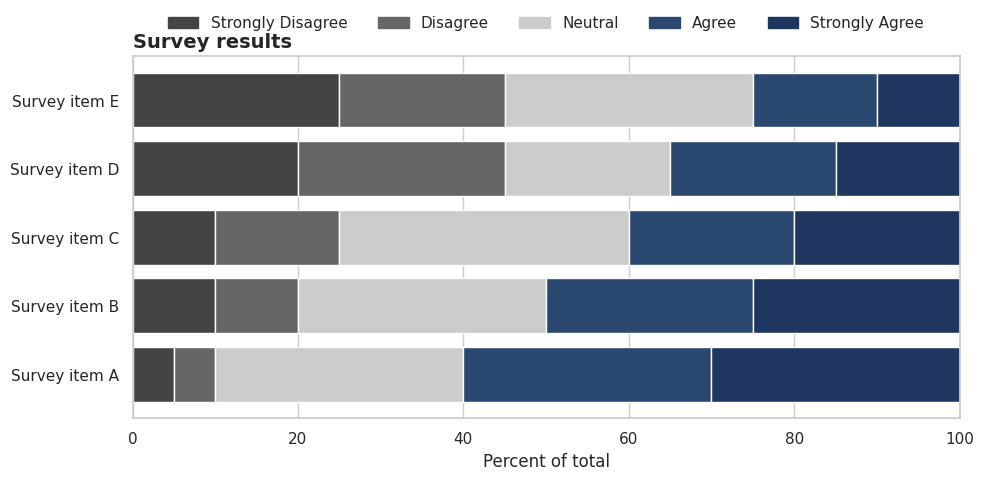

In [5]:

data = np.array([
    [5, 5, 30, 30, 30],   
    [10, 10, 30, 25, 25], 
    [10, 15, 35, 20, 20], 
    [20, 25, 20, 20, 15], 
    [25, 20, 30, 15, 10]  
])

categories = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
items = ['Survey item A', 'Survey item B', 'Survey item C', 'Survey item D', 'Survey item E']

colors = ['#444444', '#666666', '#cccccc', '#2b4970', '#1f3660']

fig, ax = plt.subplots(figsize=(10, 5))
left = np.zeros(len(data))

for i in range(data.shape[1]):
    ax.barh(items, data[:, i], left=left, color=colors[i], edgecolor='white', height=0.8)
    left += data[:, i]

ax.set_xlim(0, 100)
ax.set_xlabel("Percent of total")
ax.set_title("Survey results", loc='left', fontsize=14, weight='bold')

legend_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
legend_colors = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_colors, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, frameon=False)

plt.tight_layout()
plt.show()


This graph replicates Figure 2.19 from page 58. It uses a stacked horizontal bar chart to show results from five response categories. Each bar represents a survey item, and all responses are normalized to 100%. The format makes it easy to see the distribution of sentiment across items, while the consistent left-to-right order of categories helps the viewer quickly assess results. The color gradient also helps with interpretation, moving from dark gray to deep blue.